In [1]:
import pandas as pd 
from pandas import datetime 
import matplotlib.pyplot as plt
import fbprophet

In [5]:
from google.colab import files
uploaded = files.upload()


Saving time.csv to time.csv


In [61]:
df1 = pd.read_csv("time.csv",usecols=["date","q_time_sec"])



In [62]:
df1['date'] = pd.to_datetime(df1.date)

In [52]:
df1.dtypes

date          datetime64[ns]
q_time_sec             int64
dtype: object

In [55]:
from fbprophet import Prophet

In [56]:
model=Prophet()

In [66]:
df1=df1.rename(columns={'date':'ds', 'q_time_sec' :'y'})

In [67]:
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
df1.shape

(31599, 2)

In [71]:
future_dates=model.make_future_dataframe(periods=30)

In [72]:
df1.shape

(31599, 2)

In [73]:
future_dates.head()

,ds
0,2019-10-20
1,2019-10-21
2,2019-10-22
3,2019-10-23
4,2019-10-24


In [74]:
Prediction= model.predict(future_dates)

In [75]:
Prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-20,37.163590,-66.048592,89.098928,37.163590,37.163590,-23.640426,-23.640426,-23.640426,-23.640426,-23.640426,-23.640426,0.0,0.0,0.0,13.523164
1,2019-10-21,31.843340,-58.934638,97.901649,31.843340,31.843340,-13.221243,-13.221243,-13.221243,-13.221243,-13.221243,-13.221243,0.0,0.0,0.0,18.622097
2,2019-10-22,26.523089,-49.439356,113.617278,26.523089,26.523089,0.982797,0.982797,0.982797,0.982797,0.982797,0.982797,0.0,0.0,0.0,27.505886
3,2019-10-23,33.890421,-34.314657,129.816342,33.890421,33.890421,10.772943,10.772943,10.772943,10.772943,10.772943,10.772943,0.0,0.0,0.0,44.663364
4,2019-10-24,14.616289,-54.425696,100.849029,14.616289,14.616289,9.161830,9.161830,9.161830,9.161830,9.161830,9.161830,0.0,0.0,0.0,23.778119


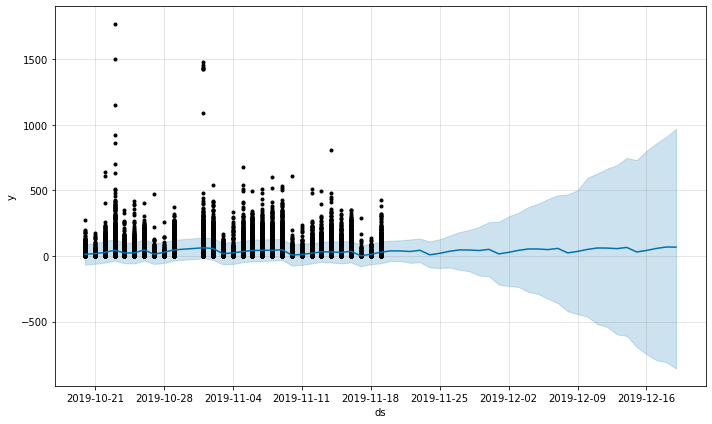

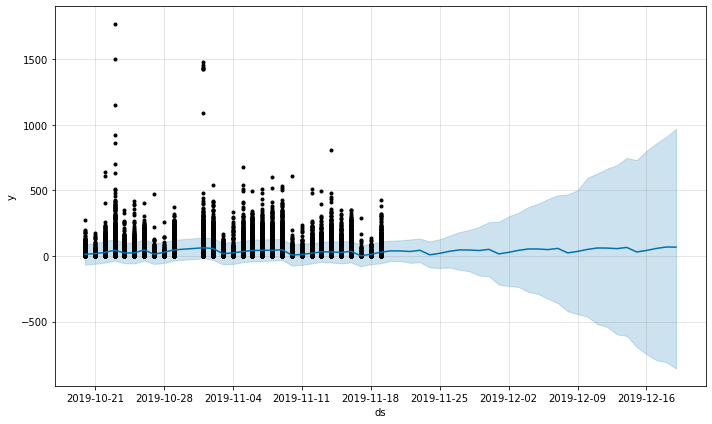

In [76]:
model.plot(Prediction)

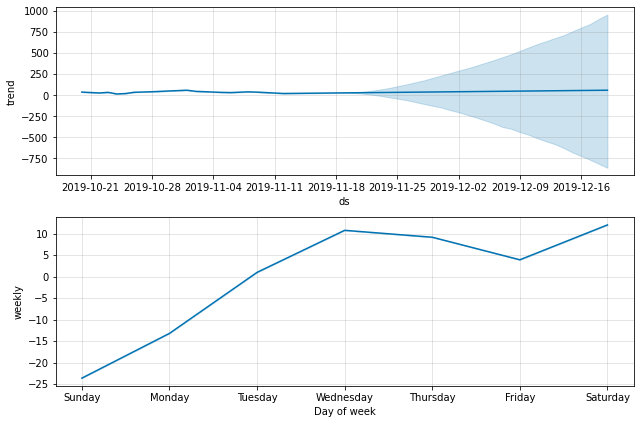

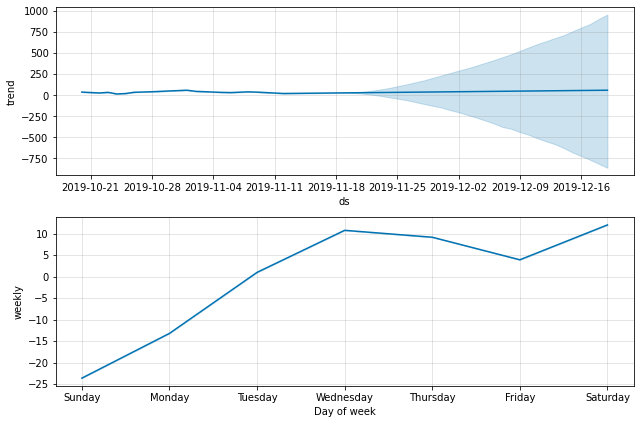

In [77]:
model.plot_components(Prediction)